# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [4]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [6]:
# Load the dataset
emp_df = pd.read_csv(r'Employee_data.csv')

In [7]:
# Check the first few entries
emp_df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [8]:
# Inspect the shape of the dataset
emp_df.shape

(74610, 24)

In [9]:
# Inspect the different columns in the dataset
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.2 Check the basic statistics**

In [10]:
# Check the summary of the dataset
emp_df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [11]:
# Check the info to see the types of the feature variables and the null values present
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [12]:
# Check the number of missing values in each column
emp_df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [13]:
# Check the percentage of missing values in each column
round(100*emp_df.isnull().sum() / len(emp_df),2)


Employee ID                   0.00
Age                           0.00
Gender                        0.00
Years at Company              0.00
Job Role                      0.00
Monthly Income                0.00
Work-Life Balance             0.00
Job Satisfaction              0.00
Performance Rating            0.00
Number of Promotions          0.00
Overtime                      0.00
Distance from Home            2.56
Education Level               0.00
Marital Status                0.00
Number of Dependents          0.00
Job Level                     0.00
Company Size                  0.00
Company Tenure (In Months)    3.23
Remote Work                   0.00
Leadership Opportunities      0.00
Innovation Opportunities      0.00
Company Reputation            0.00
Employee Recognition          0.00
Attrition                     0.00
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [14]:
# Handle the missing value rows in the column


emp_df['Distance from Home'].fillna(emp_df['Distance from Home'].median(), inplace=True)
emp_df['Company Tenure (In Months)'].fillna(emp_df['Company Tenure (In Months)'].median(), inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [15]:
# Check the percentage of remaining data after missing values are removed
round(100*emp_df.isnull().sum() / len(emp_df),2)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [16]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_redundancy(emp_df):
    cat_cols = emp_df.select_dtypes(include=['object','category']).columns

    for col in cat_cols:
        print('Column :'+col)
        print(emp_df[col].unique())
        print('-'*40)
check_redundancy(emp_df)

Column :Gender
['Male' 'Female']
----------------------------------------
Column :Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
----------------------------------------
Column :Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
----------------------------------------
Column :Job Satisfaction
['Medium' 'High' 'Very High' 'Low']
----------------------------------------
Column :Performance Rating
['Average' 'Low' 'High' 'Below Average']
----------------------------------------
Column :Overtime
['No' 'Yes']
----------------------------------------
Column :Education Level
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
----------------------------------------
Column :Marital Status
['Married' 'Divorced' 'Single']
----------------------------------------
Column :Job Level
['Mid' 'Senior' 'Entry']
----------------------------------------
Column :Company Size
['Medium' 'Small' 'Large']
----------------------------------------
Column :

In [17]:

emp_df['Education Level'] = emp_df['Education Level'].str.replace('â€™', "'", regex=False)

In [18]:
cat_cols = emp_df.select_dtypes(include='object').columns
for col in cat_cols:
    emp_df[col] = emp_df[col].astype(str).str.strip().str.lower()
    emp_df[col] = emp_df[col].str.replace('â€™', "'", regex=False)

In [19]:
#Check the data
emp_df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    male                19   education            5390   
1        64756   59  female                 4       media            5534   
2        30257   24  female                10  healthcare            8159   
3        65791   36  female                 7   education            3989   
4        65026   56    male                41   education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         excellent           medium            average                     2   
1              poor             high                low                     3   
2              good             high                low                     0   
3              good             high               high                     1   
4              fair        very high            average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        mid       medium   
1  ...                    3        mid       medium   
2  ...                    3        mid       medium   
3  ...                    2        mid        small   
4  ...                    0     senior       medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           no                       no   
1                       21.0           no                       no   
2                       74.0           no                       no   
3                       50.0          yes                       no   
4                       68.0           no                       no   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       no           excellent               medium    stayed  
1                       no                fair                  low    stayed  
2                       no                poor                  low    stayed  
3                       no                good               medium    stayed  
4                       no                fair               medium    stayed  

[5 rows x 24 columns]

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [20]:
# Drop redundant columns which are not required for modelling
# Since Years at Company col is very close to age seems there are wrong values . Hence Dropping the columns
# Also dropping emp id column as it is unique for every employee
emp_df = emp_df.drop(columns=['Employee ID','Years at Company'],axis=1)

In [21]:
emp_df = emp_df.drop_duplicates(keep='first')

In [22]:
# Check first few rows of data
emp_df.head()

Age  Gender    Job Role  Monthly Income Work-Life Balance Job Satisfaction  \
0   31    male   education            5390         excellent           medium   
1   59  female       media            5534              poor             high   
2   24  female  healthcare            8159              good             high   
3   36  female   education            3989              good             high   
4   56    male   education            4821              fair        very high   

  Performance Rating  Number of Promotions Overtime  Distance from Home  ...  \
0            average                     2       no                22.0  ...   
1                low                     3       no                21.0  ...   
2                low                     0       no                11.0  ...   
3               high                     1       no                27.0  ...   
4            average                     0      yes                71.0  ...   

  Number of Dependents Job Level  Company Size Company Tenure (In Months)  \
0                    0       mid        medium                       89.0   
1                    3       mid        medium                       21.0   
2                    3       mid        medium                       74.0   
3                    2       mid         small                       50.0   
4                    0    senior        medium                       68.0   

  Remote Work  Leadership Opportunities Innovation Opportunities  \
0          no                        no                       no   
1          no                        no                       no   
2          no                        no                       no   
3         yes                        no                       no   
4          no                        no                       no   

  Company Reputation Employee Recognition Attrition  
0          excellent               medium    stayed  
1               fair                  low    stayed  
2               poor                  low    stayed  
3               good               medium    stayed  
4               fair               medium    stayed  

[5 rows x 22 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [23]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [24]:
# Put all the feature variables in X
X = emp_df.drop(columns=['Attrition'],axis = 1)
# Put the target variable in y
y = emp_df['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [25]:
# Split the data into 70% train data and 30% validation data
x_train,x_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 70)
print("Training feature set shape:", x_train.shape)
print("Validation feature set shape:", x_test.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_test.shape)

Training feature set shape: (52148, 21)
Validation feature set shape: (22350, 21)
Training target shape: (52148,)
Validation target shape: (22350,)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [26]:
# Select numerical columns
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['Age', 'Monthly Income', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Company Tenure (In Months)'],
      dtype='object')


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

In [27]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

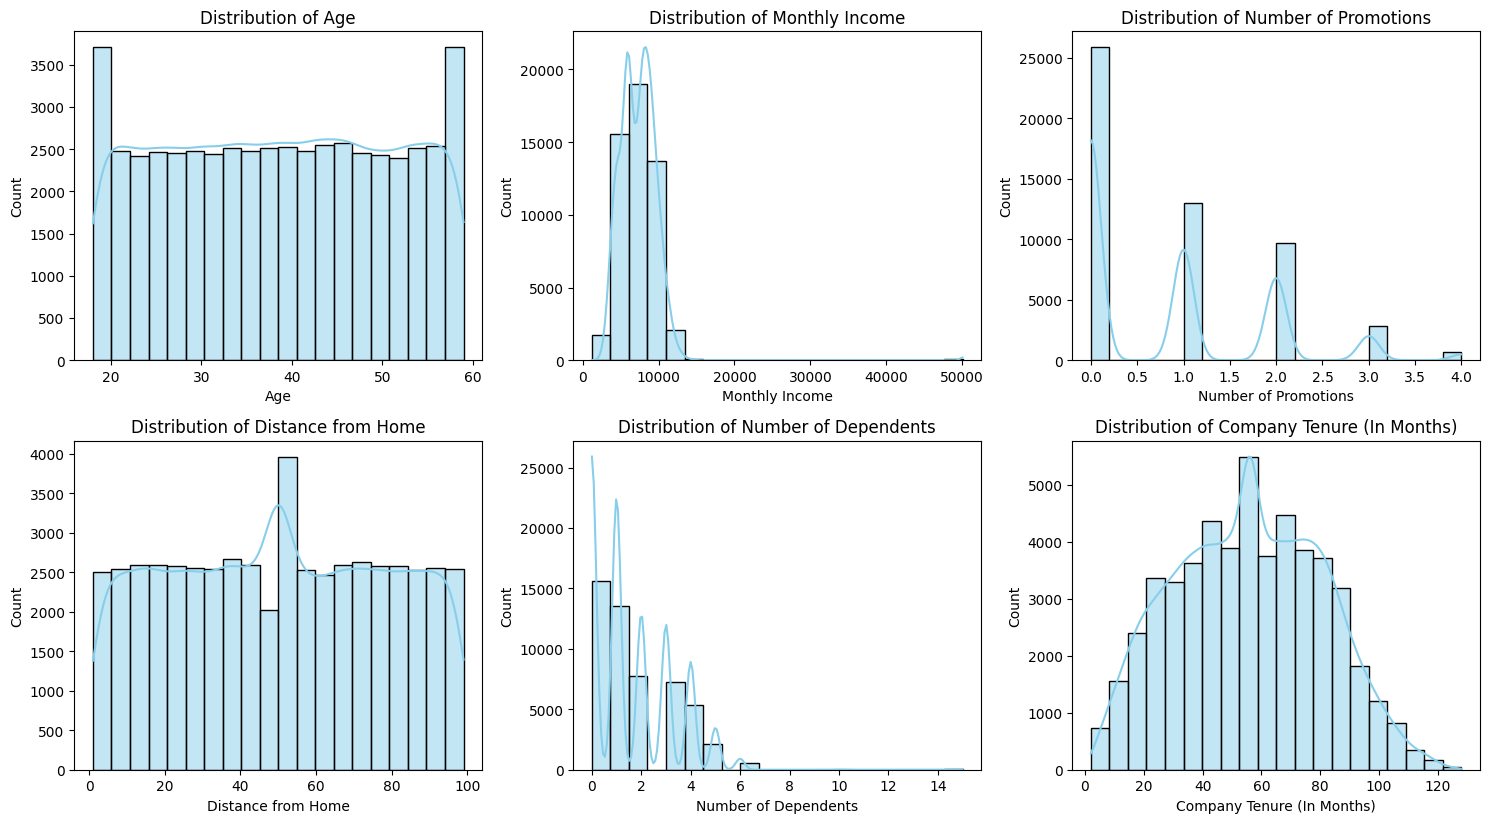

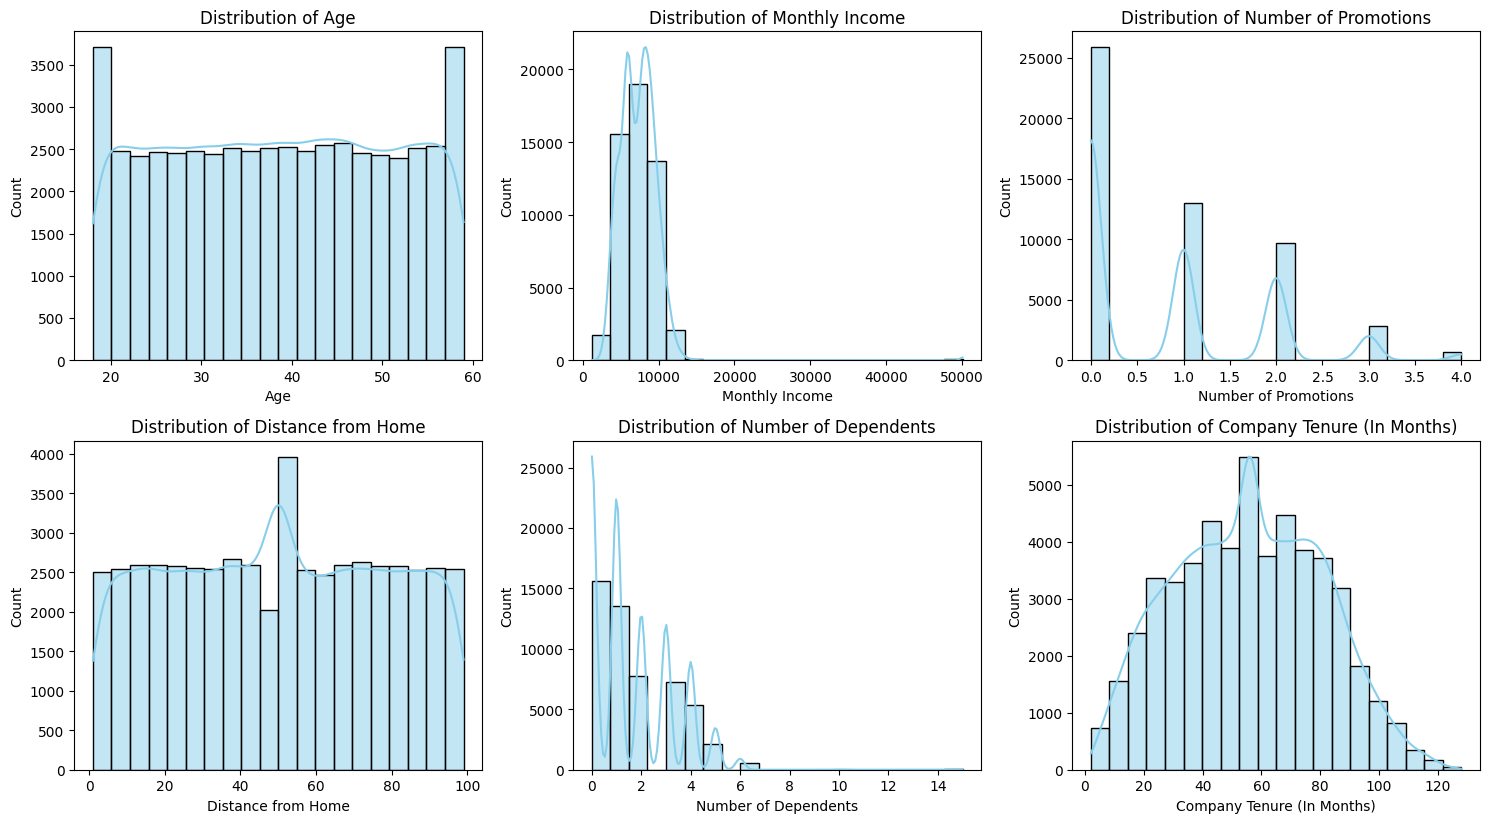

In [28]:
# Create correlation matrix for numerical columns
# Plot all the numerical columns to understand their distribution

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(x_train[col], kde=True, color='skyblue', bins=20)  # Histogram + KDE
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(x_train[col], kde=True, color='skyblue', bins=20)  # Histogram + KDE
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


# Plot Heatmap of the correlation matrix


Correlation Matrix (Numerical Columns):

                             Age  Monthly Income  Number of Promotions  \
Age                         1.00           -0.01                  0.00   
Monthly Income             -0.01            1.00                  0.00   
Number of Promotions        0.00            0.00                  1.00   
Distance from Home         -0.00           -0.00                 -0.01   
Number of Dependents        0.01           -0.00                 -0.01   
Company Tenure (In Months)  0.24           -0.01                  0.00   

                            Distance from Home  Number of Dependents  \
Age                                      -0.00                  0.01   
Monthly Income                           -0.00                 -0.00   
Number of Promotions                     -0.01                 -0.01   
Distance from Home                        1.00                 -0.00   
Number of Dependents                     -0.00                  1.00   
Company 

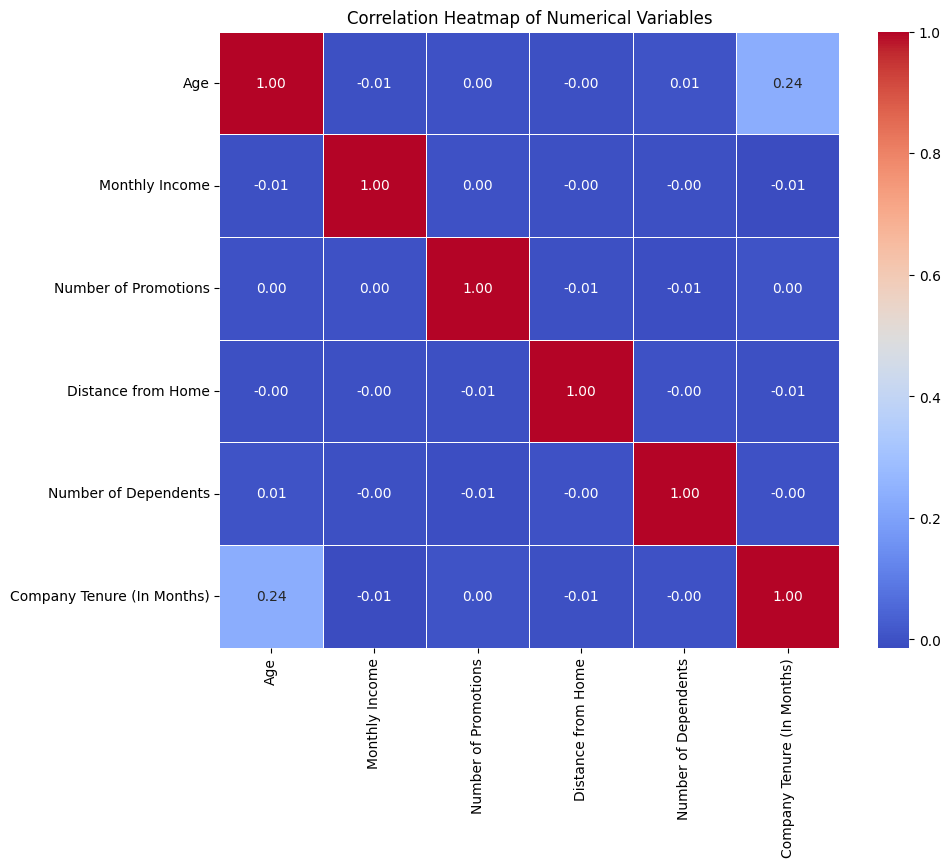

In [29]:
# Create correlation matrix for numerical columns

corr_matrix = x_train[numerical_cols].corr()


print("Correlation Matrix (Numerical Columns):\n")
print(corr_matrix.round(2))  # Round for easier reading
# Plot Heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

Check the distribution of target variable in training set to check class balance.

Class Distribution (Target Variable - Attrition):
 Attrition
stayed    27446
left      24702
Name: count, dtype: int64


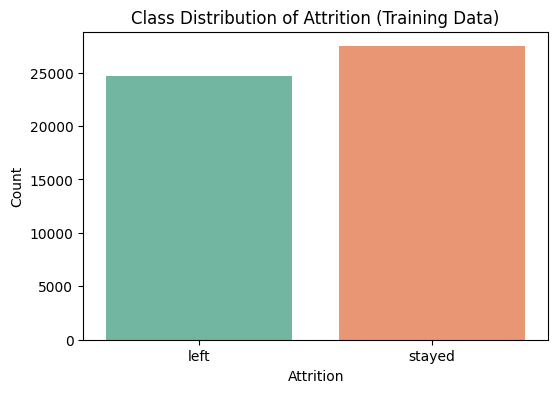

In [30]:
# Plot a bar chart to check class balance
class_distribution = y_train.value_counts()


print("Class Distribution (Target Variable - Attrition):\n", class_distribution)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution of Attrition (Training Data)')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [31]:
# Plot distribution for each categorical column with target variable
y_train.value_counts()

Attrition
stayed    27446
left      24702
Name: count, dtype: int64

In [32]:
emp_df.select_dtypes(include=['object']).columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

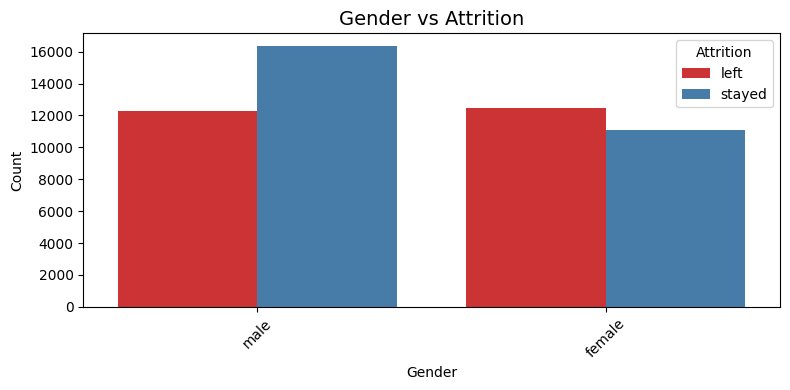

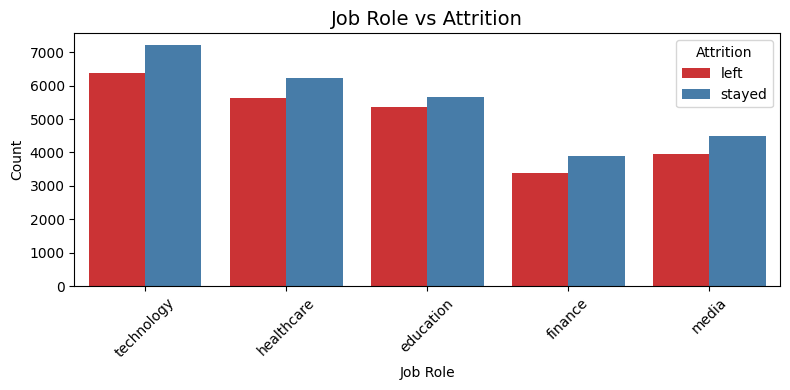

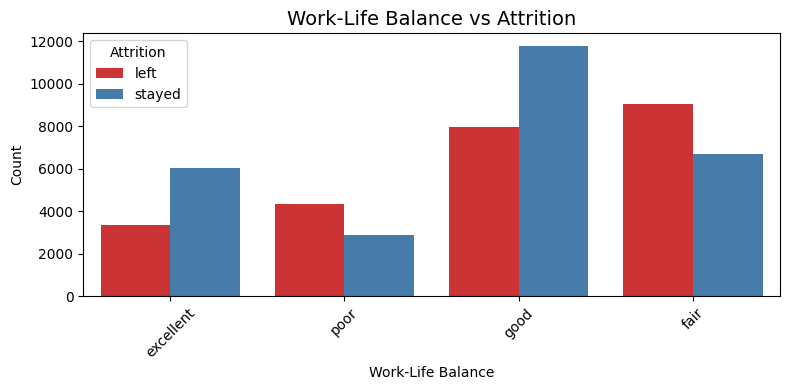

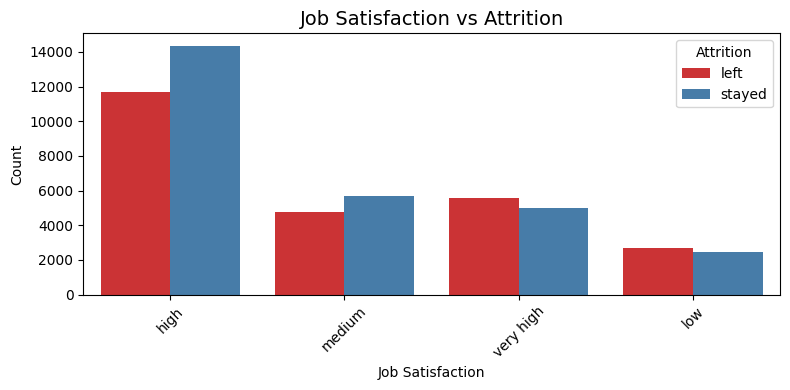

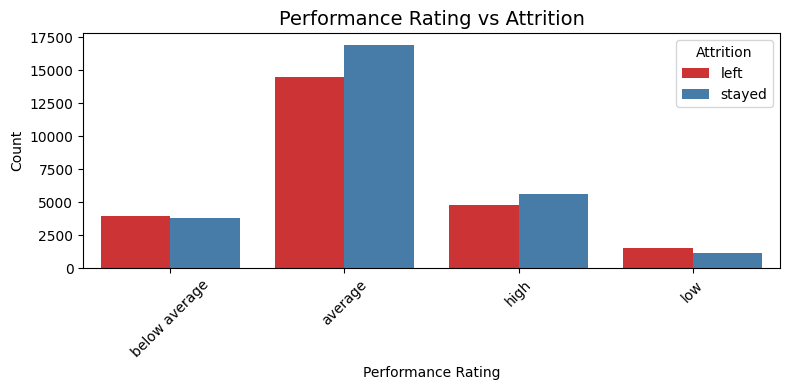

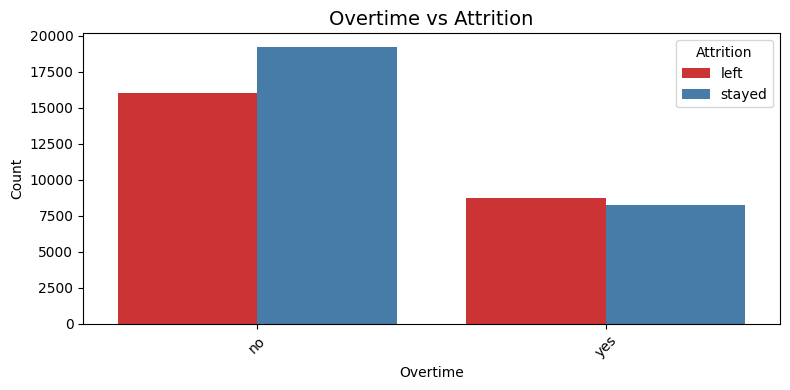

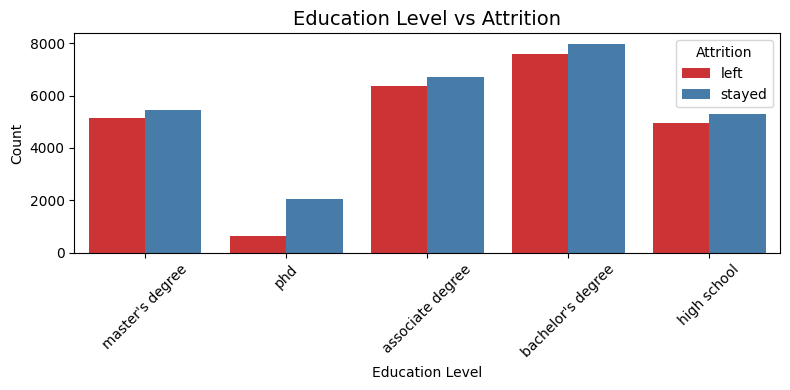

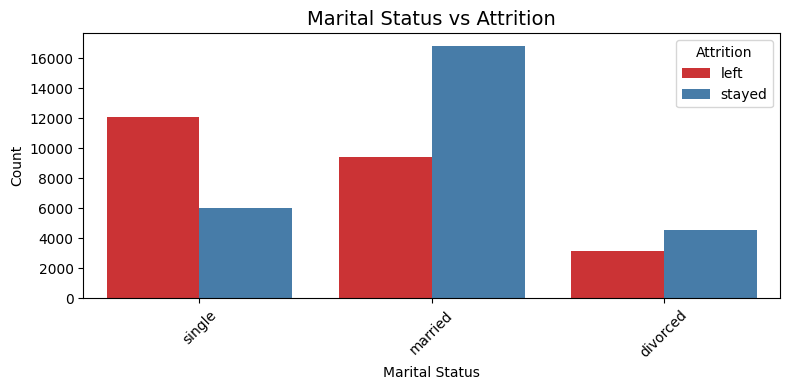

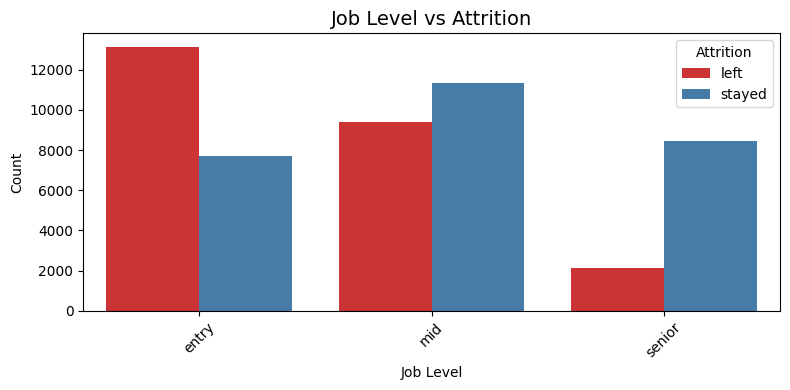

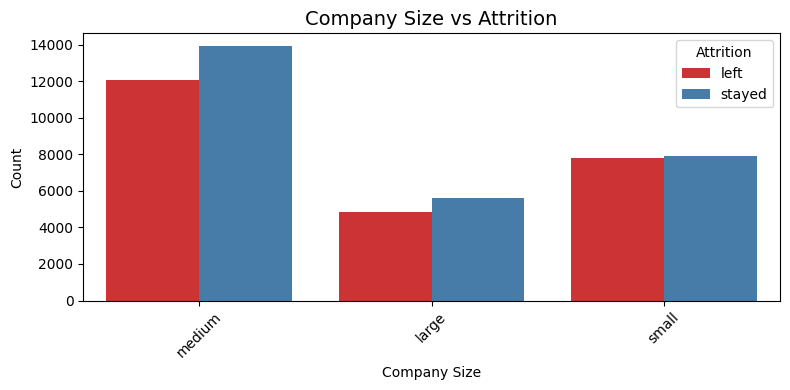

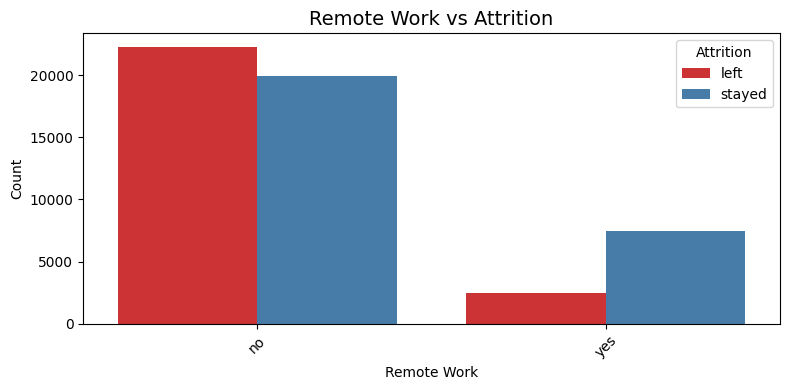

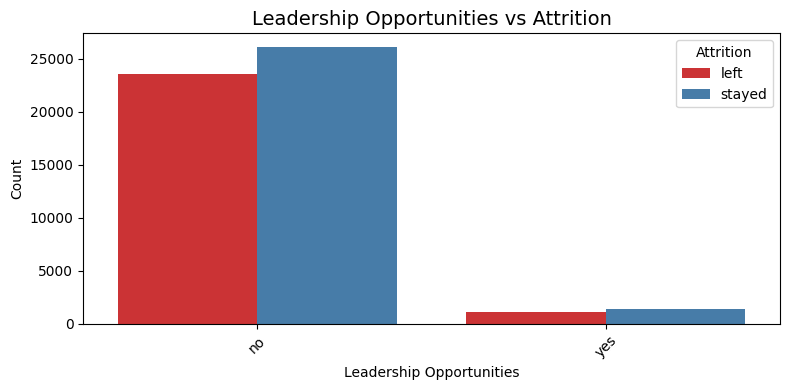

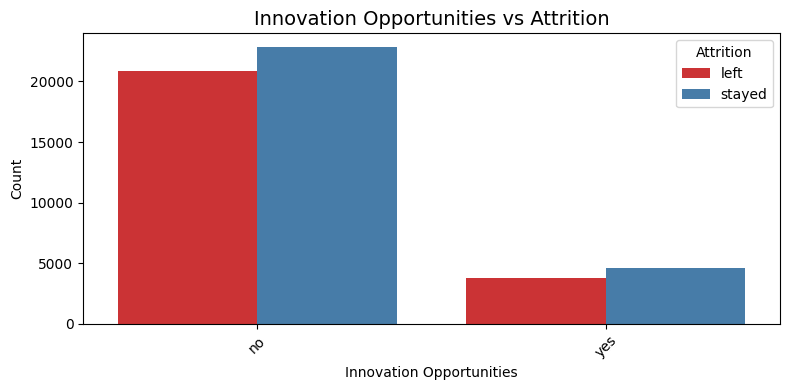

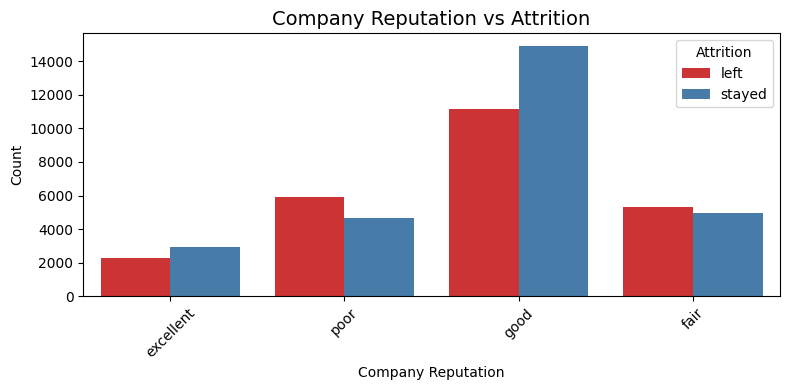

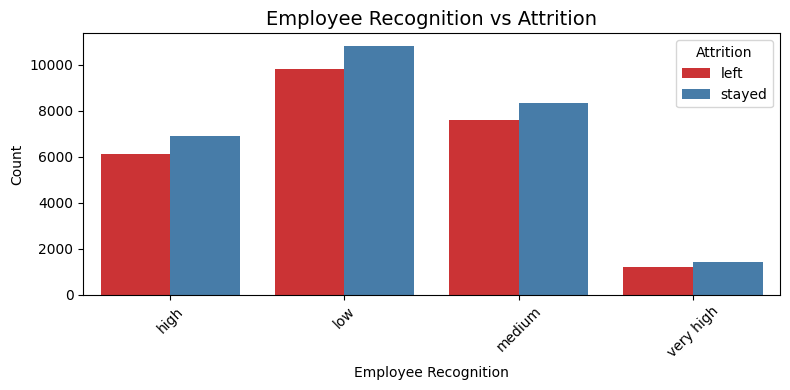

In [33]:
# Plot distribution for each categorical column with target variable
categorical_cols = x_train.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue=y_train, data=x_train, palette='Set1')
    plt.title(f'{col} vs Attrition', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [34]:
# Select numerical columns
num_cols_validation = x_test.select_dtypes(include=['int64', 'float64']).columns

# Print the selected numerical columns to check
print(num_cols_validation)

Index(['Age', 'Monthly Income', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Company Tenure (In Months)'],
      dtype='object')


5.1.2 Plot distribution of numerical columns

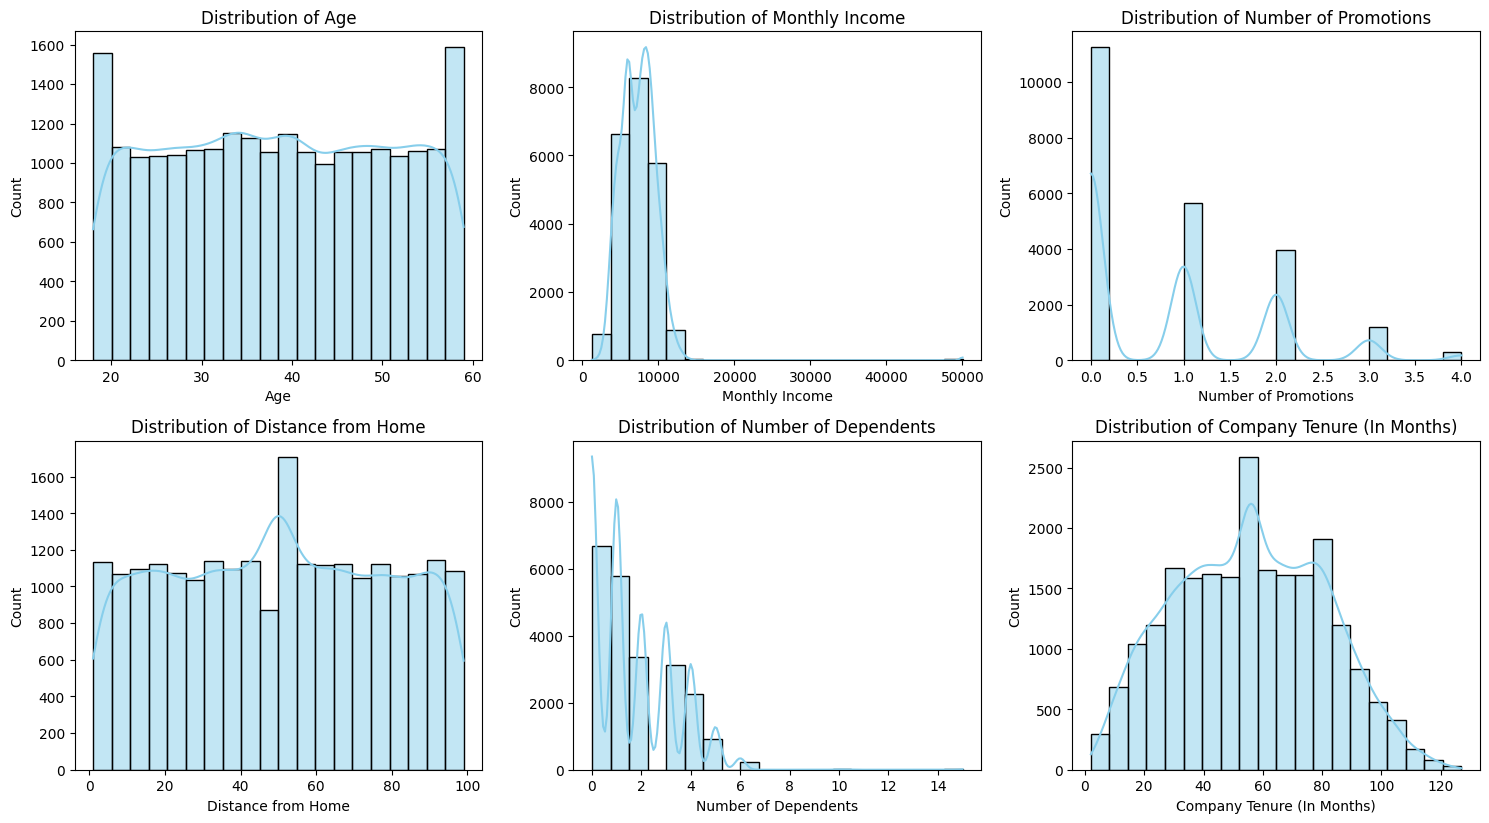

In [35]:
# Plot all the numerical columns to understand their distribution

import seaborn as sns
import matplotlib.pyplot as plt


num_cols_validation = x_test.select_dtypes(include=['int64', 'float64']).columns

# Plot the distribution for each numerical column in validation data
plt.figure(figsize=(15, 12))  # Adjust the figure size

for i, col in enumerate(num_cols_validation):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid of subplots (adjust this as needed)
    sns.histplot(x=x_test[col], kde=True, color='skyblue', bins=20)  # Plot histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  # Adjust layout to avoid overlap

plt.show()


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

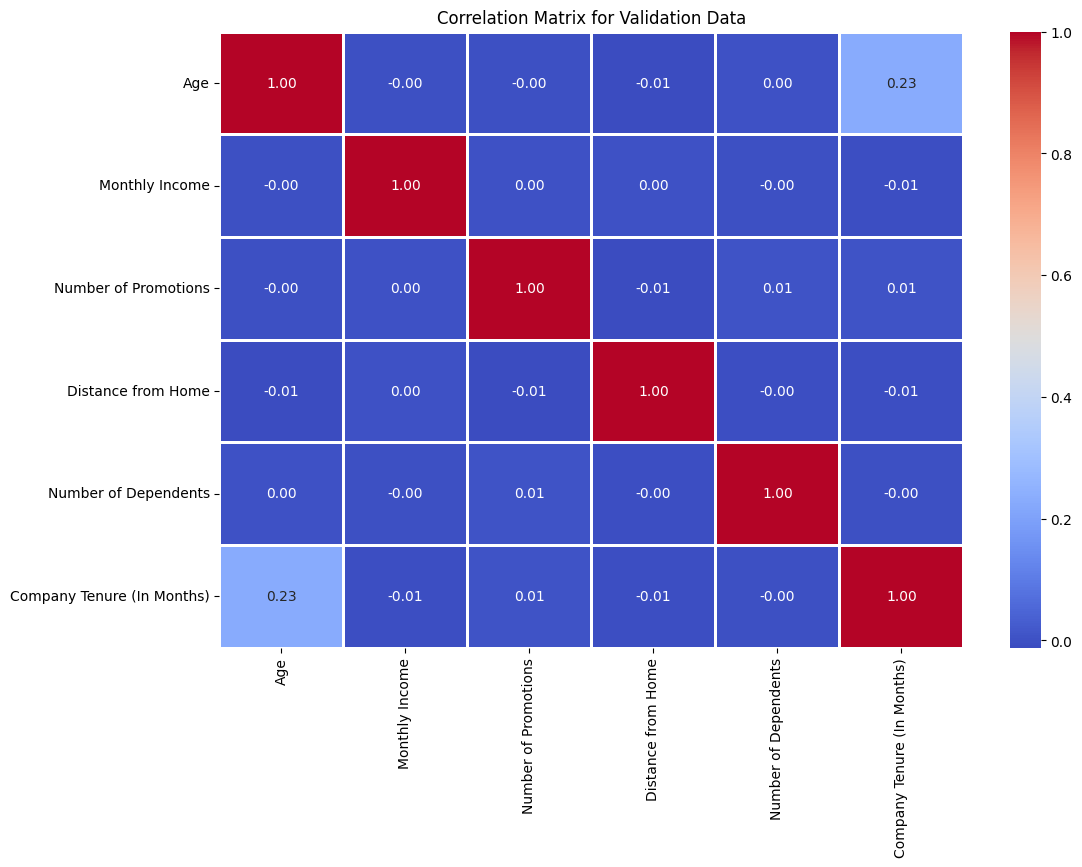

In [36]:
# Create correlation matrix for numerical columns



num_cols_validation = x_test.select_dtypes(include=['int64', 'float64']).columns


corr_matrix_validation = x_test[num_cols_validation].corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_validation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title("Correlation Matrix for Validation Data")
plt.show()




### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

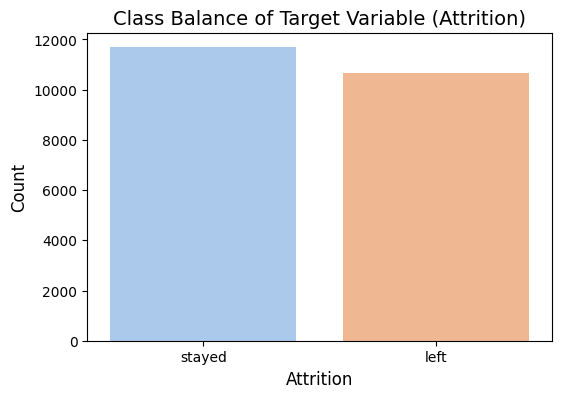

In [37]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette='pastel')


plt.title('Class Balance of Target Variable (Attrition)', fontsize=14)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

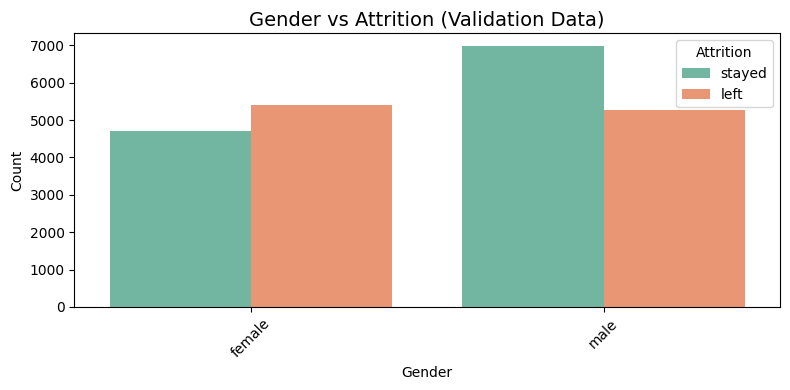

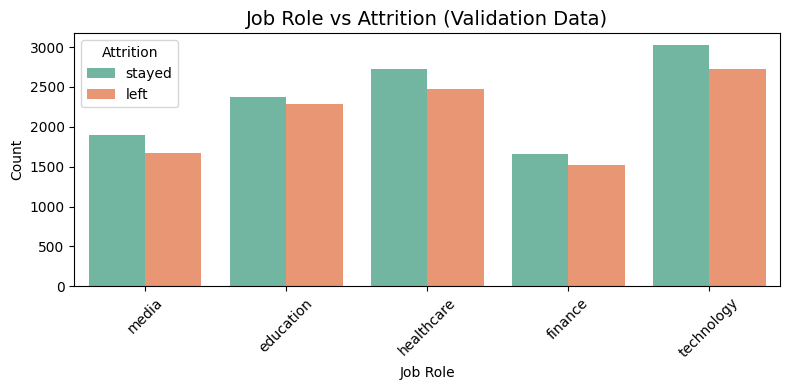

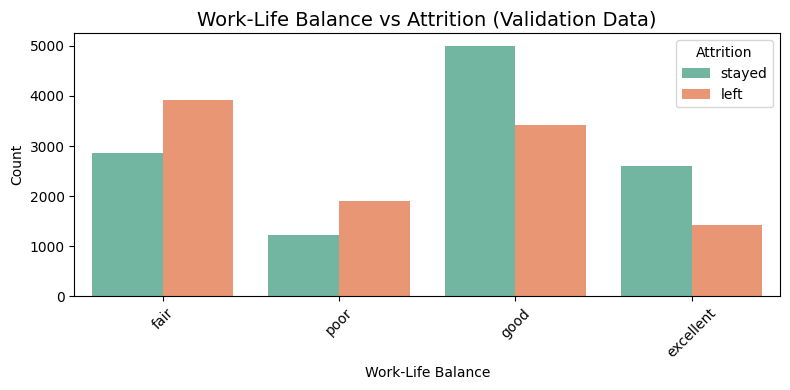

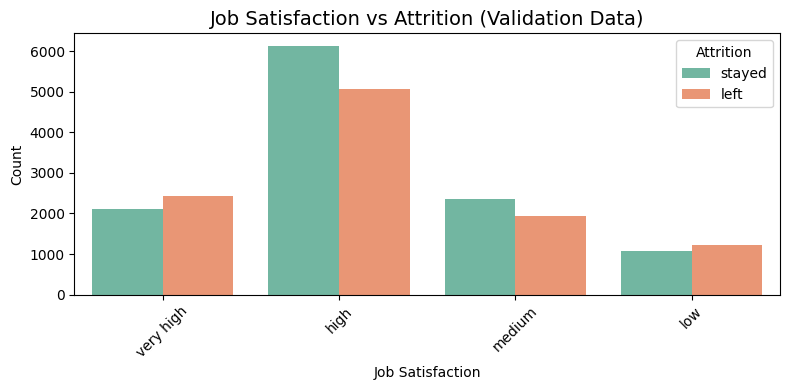

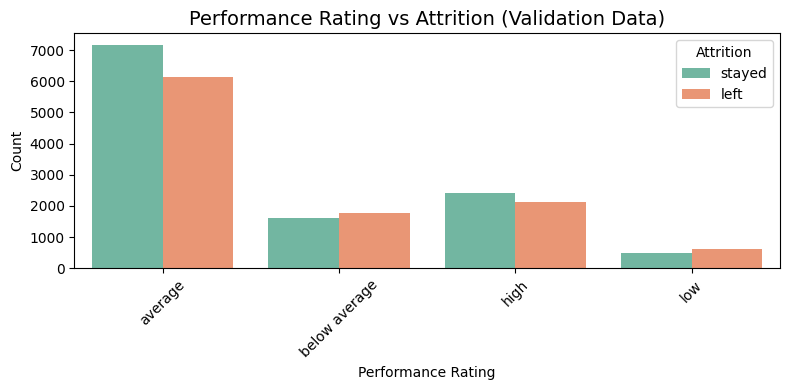

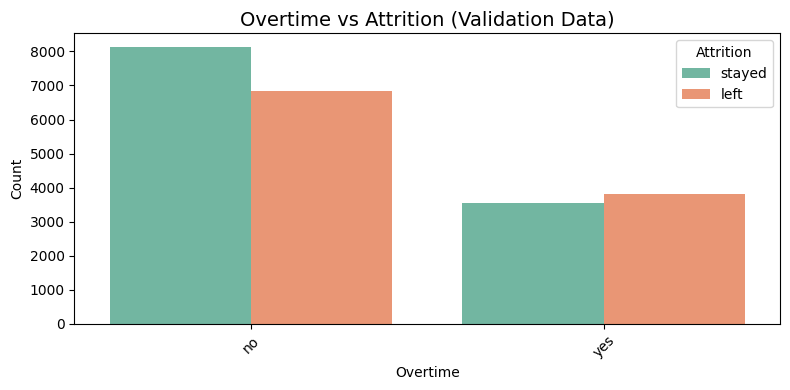

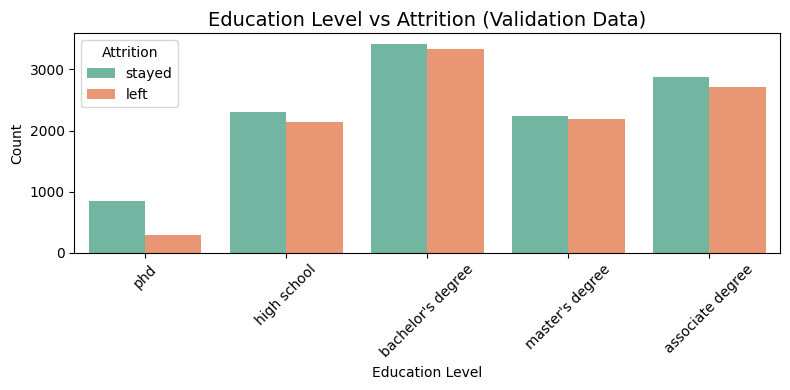

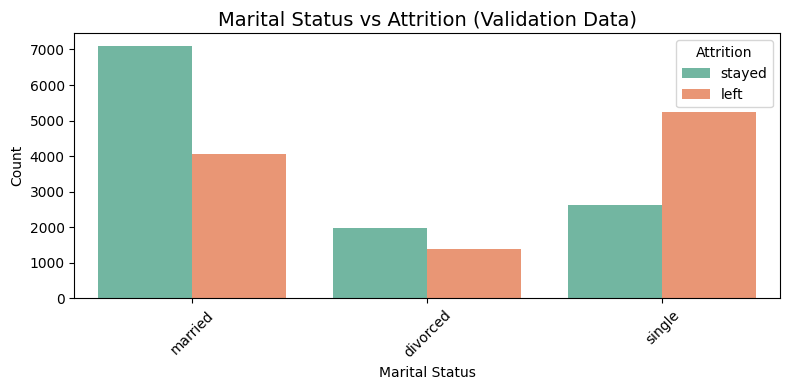

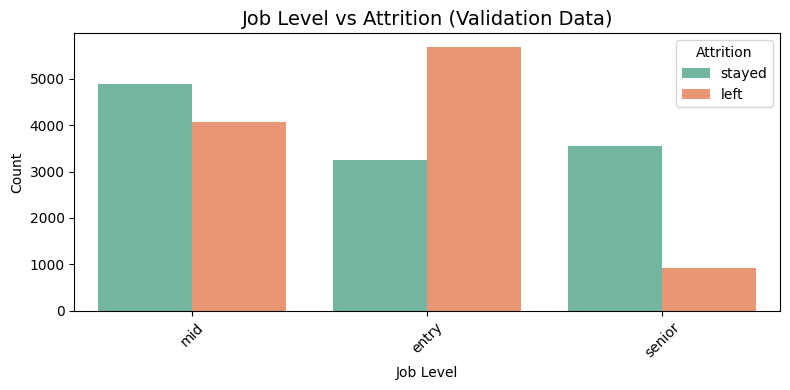

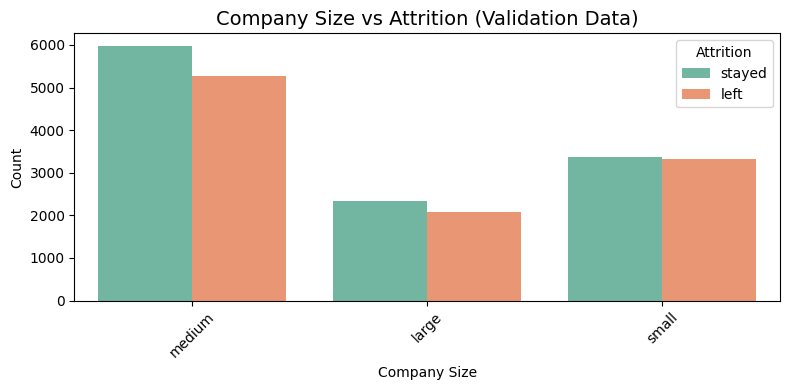

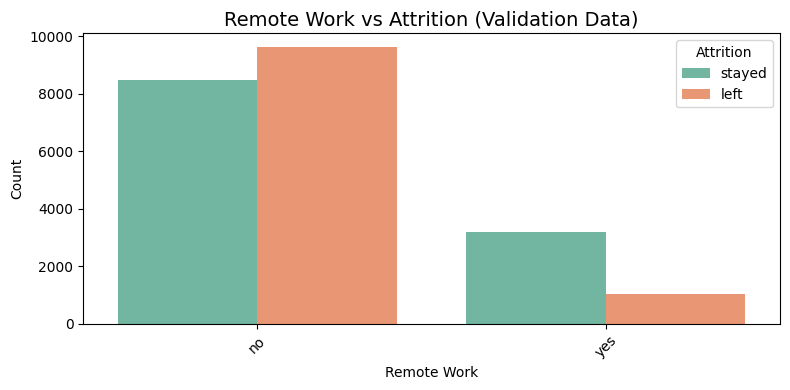

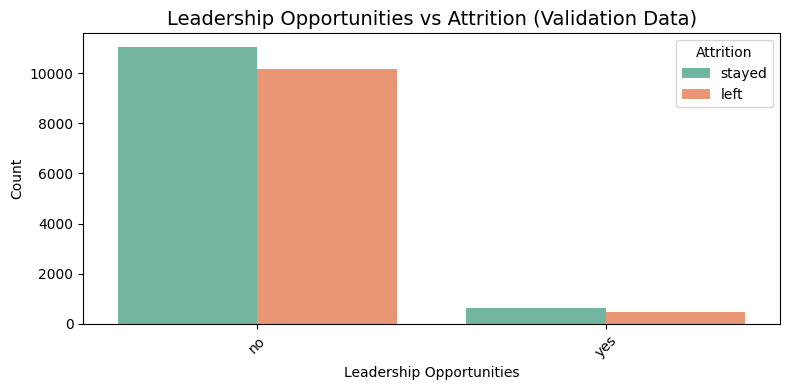

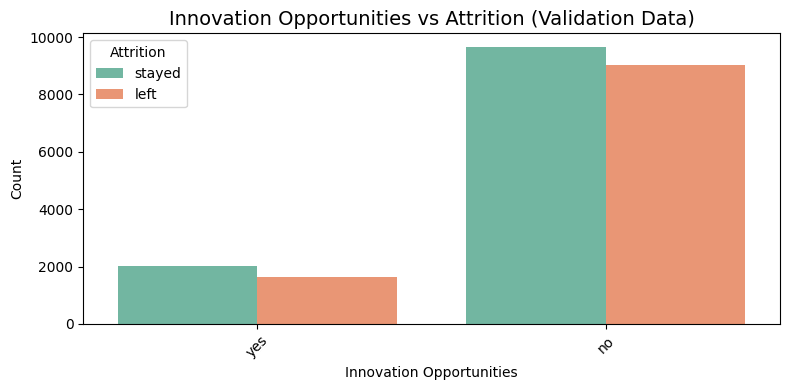

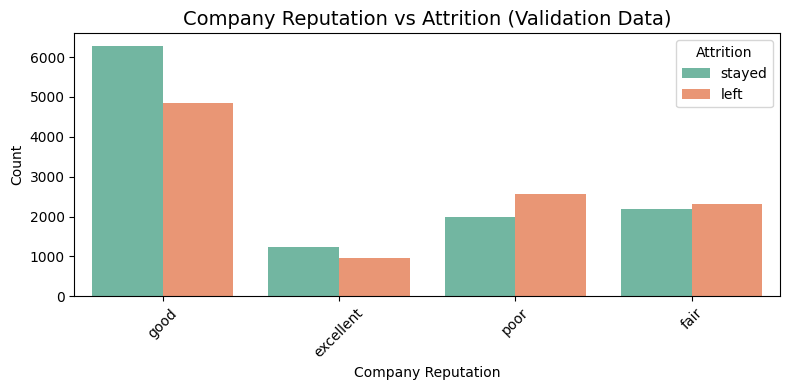

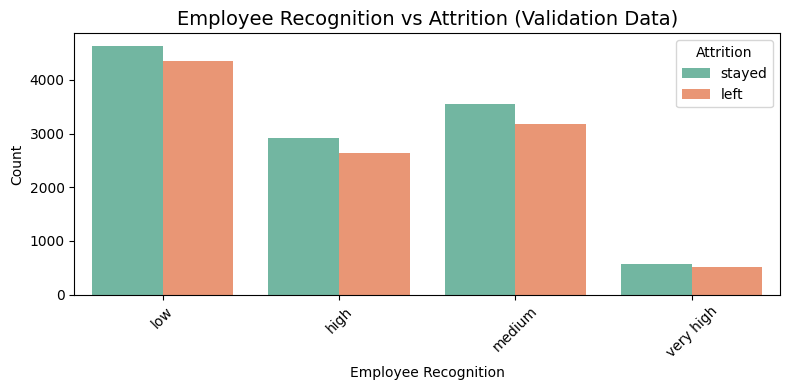

In [38]:
# Plot distribution for each categorical column with target variable

val_categorical_cols = x_test.select_dtypes(include='object').columns

for col in val_categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=x_test[col], hue=y_test, palette='Set2')
    plt.title(f'{col} vs Attrition (Validation Data)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [39]:
# Check the categorical columns
cat_cols_train = x_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns in training data that require dummy variables:")
print(cat_cols_train.tolist())

cat_cols_test = x_test.select_dtypes    (include=['object', 'category']).columns
print("\nCategorical columns in test data that require dummy variables:")
print(cat_cols_test.tolist())



Categorical columns in training data that require dummy variables:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']

Categorical columns in test data that require dummy variables:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [40]:
# Create dummy variables using the 'get_dummies' for independent columns
x_train_encoded = pd.get_dummies(x_train[cat_cols_train],drop_first=True).astype(int)

# Add the results to the master DataFrame
x_train = pd.concat([x_train, x_train_encoded], axis=1)


Now, drop the original categorical columns and check the DataFrame

In [41]:
# Drop the original categorical columns and check the DataFrame

#  1:
x_train = x_train.drop(columns=cat_cols_train,axis=1)

#2.
x_train.head()



Age  Monthly Income  Number of Promotions  Distance from Home  \
44041   19           10085                     0                77.0   
70131   33            8520                     2                17.0   
27815   39           10446                     0                88.0   
33022   33            3955                     0                30.0   
36873   50            8506                     0                77.0   

       Number of Dependents  Company Tenure (In Months)  Gender_male  \
44041                     4                        78.0            1   
70131                     1                        73.0            0   
27815                     1                        70.0            0   
33022                     3                        57.0            1   
36873                     4                        83.0            1   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
44041                 0                    0               0  ...   
70131                 0                    1               0  ...   
27815                 0                    0               0  ...   
33022                 0                    0               0  ...   
36873                 0                    0               0  ...   

       Company Size_small  Remote Work_yes  Leadership Opportunities_yes  \
44041                   0                0                             0   
70131                   0                1                             0   
27815                   0                0                             0   
33022                   0                0                             0   
36873                   0                0                             0   

       Innovation Opportunities_yes  Company Reputation_fair  \
44041                             0                        0   
70131                             0                        0   
27815                             1                        0   
33022                             0                        0   
36873                             0                        1   

       Company Reputation_good  Company Reputation_poor  \
44041                        0                        0   
70131                        0                        1   
27815                        1                        0   
33022                        0                        1   
36873                        0                        0   

       Employee Recognition_low  Employee Recognition_medium  \
44041                         0                            0   
70131                         1                            0   
27815                         1                            0   
33022                         0                            0   
36873                         0                            1   

       Employee Recognition_very high  
44041                               0  
70131                               0  
27815                               0  
33022                               0  
36873                               0  

[5 rows x 40 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [42]:
# Create dummy variables using the 'get_dummies' for independent columns

x_test_dummies = pd.get_dummies(x_test[cat_cols_test],drop_first=True).astype(int)



# Add the results to the master DataFrame
x_test = pd.concat([x_test, x_test_dummies], axis=1)


x_test.head()

Age  Gender    Job Role  Monthly Income Work-Life Balance  \
23940   53  female       media            5839              fair   
65688   21  female   education            3702              fair   
47581   24    male  healthcare            8922              poor   
68182   40  female     finance           10052              fair   
56839   25    male     finance            9938              fair   

      Job Satisfaction Performance Rating  Number of Promotions Overtime  \
23940        very high            average                     0       no   
65688             high            average                     1       no   
47581             high            average                     1      yes   
68182             high            average                     0       no   
56839           medium            average                     1       no   

       Distance from Home  ... Company Size_small Remote Work_yes  \
23940                 6.0  ...                  0               0   
65688                26.0  ...                  0               0   
47581                35.0  ...                  0               0   
68182                26.0  ...                  0               0   
56839                 6.0  ...                  0               0   

       Leadership Opportunities_yes Innovation Opportunities_yes  \
23940                             0                            1   
65688                             0                            0   
47581                             0                            1   
68182                             0                            0   
56839                             0                            0   

      Company Reputation_fair  Company Reputation_good  \
23940                       0                        1   
65688                       0                        1   
47581                       0                        1   
68182                       0                        1   
56839                       0                        1   

      Company Reputation_poor Employee Recognition_low  \
23940                       0                        1   
65688                       0                        0   
47581                       0                        0   
68182                       0                        1   
56839                       0                        0   

      Employee Recognition_medium Employee Recognition_very high  
23940                           0                              0  
65688                           0                              0  
47581                           1                              0  
68182                           0                              0  
56839                           0                              0  

[5 rows x 55 columns]

Now, drop the original categorical columns and check the DataFrame

In [43]:
# Drop categorical columns and check the DataFrame
#  1:
x_test = x_test.drop(columns=cat_cols_test,axis=1)

#2.
x_test.head()

Age  Monthly Income  Number of Promotions  Distance from Home  \
23940   53            5839                     0                 6.0   
65688   21            3702                     1                26.0   
47581   24            8922                     1                35.0   
68182   40           10052                     0                26.0   
56839   25            9938                     1                 6.0   

       Number of Dependents  Company Tenure (In Months)  Gender_male  \
23940                     0                        42.0            0   
65688                     1                         5.0            0   
47581                     1                        59.0            1   
68182                     0                        56.0            0   
56839                     4                        21.0            1   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
23940                 0                    0               1  ...   
65688                 0                    0               0  ...   
47581                 0                    1               0  ...   
68182                 1                    0               0  ...   
56839                 1                    0               0  ...   

       Company Size_small  Remote Work_yes  Leadership Opportunities_yes  \
23940                   0                0                             0   
65688                   0                0                             0   
47581                   0                0                             0   
68182                   0                0                             0   
56839                   0                0                             0   

       Innovation Opportunities_yes  Company Reputation_fair  \
23940                             1                        0   
65688                             0                        0   
47581                             1                        0   
68182                             0                        0   
56839                             0                        0   

       Company Reputation_good  Company Reputation_poor  \
23940                        1                        0   
65688                        1                        0   
47581                        1                        0   
68182                        1                        0   
56839                        1                        0   

       Employee Recognition_low  Employee Recognition_medium  \
23940                         1                            0   
65688                         0                            0   
47581                         0                            1   
68182                         1                            0   
56839                         0                            0   

       Employee Recognition_very high  
23940                               0  
65688                               0  
47581                               0  
68182                               0  
56839                               0  

[5 rows x 40 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [44]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [45]:
# Create dummy variables using the 'get_dummies' for dependent column
dummy3 = pd.get_dummies(y_train, drop_first = True, dtype=int)

# Add the results to the master DataFrame
y_train = pd.concat([y_train, dummy3], axis = 1)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [46]:

# Create dummy variables using the 'get_dummies' for dependent column
dummy4 = pd.get_dummies(y_test, drop_first = True, dtype=int)

# Add the results to the master DataFrame
y_test = pd.concat([y_test, dummy4], axis = 1)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [47]:
# Drop redundant columns from both train and validation

y_train.drop("Attrition", inplace=True, axis=1)
y_test.drop("Attrition", inplace=True, axis=1)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [48]:
# Import the necessary scaling tool from scikit-learn

from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [49]:
# Scale the numeric features present in the training set


numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

#  fitting scaler on training set, transform both train and test
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])



print("Numerical features scaled successfully for Training Dataset.")
x_train.head()


# Scale the numerical features present in the validation set

numeric_cols = x_test.select_dtypes(include=['int64', 'float64']).columns


#  fitting scaler on training set, transform both train and test
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])


print("Numerical features scaled successfully for testing Dataset.")
x_test.head()


Numerical features scaled successfully for Training Dataset.
Numerical features scaled successfully for testing Dataset.


Age  Monthly Income  Number of Promotions  Distance from Home  \
23940  1.195372       -0.581557             -0.840631           -1.563329   
65688 -1.450610       -1.410119              0.162348           -0.852706   
47581 -1.202549        0.613790              0.162348           -0.532926   
68182  0.120442        1.051916             -0.840631           -0.852706   
56839 -1.119862        1.007716              0.162348           -1.563329   

       Number of Dependents  Company Tenure (In Months)  Gender_male  \
23940             -1.048796                   -0.549443    -1.101849   
65688             -0.415677                   -2.031413    -1.101849   
47581             -0.415677                    0.131463     0.907566   
68182             -1.048796                    0.011303    -1.101849   
56839              1.483680                   -1.390561     0.907566   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
23940         -0.402614            -0.542864        2.277924  ...   
65688         -0.402614            -0.542864       -0.438996  ...   
47581         -0.402614             1.842080       -0.438996  ...   
68182          2.483766            -0.542864       -0.438996  ...   
56839          2.483766            -0.542864       -0.438996  ...   

       Company Size_small  Remote Work_yes  Leadership Opportunities_yes  \
23940           -0.655329        -0.485827                     -0.225245   
65688           -0.655329        -0.485827                     -0.225245   
47581           -0.655329        -0.485827                     -0.225245   
68182           -0.655329        -0.485827                     -0.225245   
56839           -0.655329        -0.485827                     -0.225245   

       Innovation Opportunities_yes  Company Reputation_fair  \
23940                      2.277118                -0.495543   
65688                     -0.439151                -0.495543   
47581                      2.277118                -0.495543   
68182                     -0.439151                -0.495543   
56839                     -0.439151                -0.495543   

       Company Reputation_good  Company Reputation_poor  \
23940                 1.000422                -0.504473   
65688                 1.000422                -0.504473   
47581                 1.000422                -0.504473   
68182                 1.000422                -0.504473   
56839                 1.000422                -0.504473   

       Employee Recognition_low  Employee Recognition_medium  \
23940                  1.235586                    -0.663112   
65688                 -0.809333                    -0.663112   
47581                 -0.809333                     1.508041   
68182                  1.235586                    -0.663112   
56839                 -0.809333                    -0.663112   

       Employee Recognition_very high  
23940                       -0.228562  
65688                       -0.228562  
47581                       -0.228562  
68182                       -0.228562  
56839                       -0.228562  

[5 rows x 40 columns]

In [50]:
x_train.head()

Age  Monthly Income  Number of Promotions  Distance from Home  \
44041 -1.615983        1.064711             -0.840631            0.959382   
70131 -0.458366        0.457926              1.165327           -1.172486   
27815  0.037755        1.204678             -0.840631            1.350225   
33022 -0.458366       -1.312026             -0.840631           -0.710581   
36873  0.947311        0.452498             -0.840631            0.959382   

       Number of Dependents  Company Tenure (In Months)  Gender_male  \
44041              1.483680                    0.892474     0.907566   
70131             -0.415677                    0.692208    -1.101849   
27815             -0.415677                    0.572048    -1.101849   
33022              0.850561                    0.051356     0.907566   
36873              1.483680                    1.092741     0.907566   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
44041         -0.402614            -0.542864       -0.438996  ...   
70131         -0.402614             1.842080       -0.438996  ...   
27815         -0.402614            -0.542864       -0.438996  ...   
33022         -0.402614            -0.542864       -0.438996  ...   
36873         -0.402614            -0.542864       -0.438996  ...   

       Company Size_small  Remote Work_yes  Leadership Opportunities_yes  \
44041           -0.655329        -0.485827                     -0.225245   
70131           -0.655329         2.058348                     -0.225245   
27815           -0.655329        -0.485827                     -0.225245   
33022           -0.655329        -0.485827                     -0.225245   
36873           -0.655329        -0.485827                     -0.225245   

       Innovation Opportunities_yes  Company Reputation_fair  \
44041                     -0.439151                -0.495543   
70131                     -0.439151                -0.495543   
27815                      2.277118                -0.495543   
33022                     -0.439151                -0.495543   
36873                     -0.439151                 2.017986   

       Company Reputation_good  Company Reputation_poor  \
44041                -0.999578                -0.504473   
70131                -0.999578                 1.982269   
27815                 1.000422                -0.504473   
33022                -0.999578                 1.982269   
36873                -0.999578                -0.504473   

       Employee Recognition_low  Employee Recognition_medium  \
44041                 -0.809333                    -0.663112   
70131                  1.235586                    -0.663112   
27815                  1.235586                    -0.663112   
33022                 -0.809333                    -0.663112   
36873                 -0.809333                     1.508041   

       Employee Recognition_very high  
44041                       -0.228562  
70131                       -0.228562  
27815                       -0.228562  
33022                       -0.228562  
36873                       -0.228562  

[5 rows x 40 columns]

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [51]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression

#create a LogisticRegression object
lm = LogisticRegression()


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [52]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lm, n_features_to_select= 15)
rfe = rfe.fit(x_train, y_train["Attrition_stayed"])

In [53]:
# Display the features selected by RFE
for col, rank in zip(x_train.columns[rfe.support_], rfe.ranking_[rfe.support_]):
    print(f'{col}: Rank {rank}')

Number of Promotions: Rank 1
Distance from Home: Rank 1
Number of Dependents: Rank 1
Gender_male: Rank 1
Work-Life Balance_fair: Rank 1
Work-Life Balance_poor: Rank 1
Job Satisfaction_very high: Rank 1
Overtime_yes: Rank 1
Education Level_phd: Rank 1
Marital Status_single: Rank 1
Job Level_mid: Rank 1
Job Level_senior: Rank 1
Remote Work_yes: Rank 1
Company Reputation_fair: Rank 1
Company Reputation_poor: Rank 1


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [54]:
# Put columns selected by RFE into variable 'col'
col = x_train.columns[rfe.support_]
col

Index(['Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Gender_male', 'Work-Life Balance_fair', 'Work-Life Balance_poor',
       'Job Satisfaction_very high', 'Overtime_yes', 'Education Level_phd',
       'Marital Status_single', 'Job Level_mid', 'Job Level_senior',
       'Remote Work_yes', 'Company Reputation_fair',
       'Company Reputation_poor'],
      dtype='object')

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [55]:
# Select only the columns selected by RFE

x_train = x_train[col]

In [56]:
# View the training data
x_train.head()

Number of Promotions  Distance from Home  Number of Dependents  \
44041             -0.840631            0.959382              1.483680   
70131              1.165327           -1.172486             -0.415677   
27815             -0.840631            1.350225             -0.415677   
33022             -0.840631           -0.710581              0.850561   
36873             -0.840631            0.959382              1.483680   

       Gender_male  Work-Life Balance_fair  Work-Life Balance_poor  \
44041     0.907566               -0.657662               -0.401649   
70131    -1.101849               -0.657662                2.489736   
27815    -1.101849               -0.657662                2.489736   
33022     0.907566               -0.657662                2.489736   
36873     0.907566               -0.657662               -0.401649   

       Job Satisfaction_very high  Overtime_yes  Education Level_phd  \
44041                   -0.502767     -0.694432            -0.232667   
70131                   -0.502767     -0.694432             4.297993   
27815                   -0.502767     -0.694432            -0.232667   
33022                   -0.502767     -0.694432            -0.232667   
36873                    1.988993     -0.694432            -0.232667   

       Marital Status_single  Job Level_mid  Job Level_senior  \
44041               1.368522      -0.812484         -0.504443   
70131              -0.730716       1.230794         -0.504443   
27815              -0.730716       1.230794         -0.504443   
33022               1.368522       1.230794         -0.504443   
36873              -0.730716      -0.812484          1.982386   

       Remote Work_yes  Company Reputation_fair  Company Reputation_poor  
44041        -0.485827                -0.495543                -0.504473  
70131         2.058348                -0.495543                 1.982269  
27815        -0.485827                -0.495543                -0.504473  
33022        -0.485827                -0.495543                 1.982269  
36873        -0.485827                 2.017986                -0.504473

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [57]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
x_train_const= sm.add_constant(x_train)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [58]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
from sklearn.linear_model import LogisticRegression
logit_model  = sm.GLM(y_train, x_train_const,family = sm.families.Binomial())
res = logit_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Attrition_stayed   No. Observations:                52148
Model:                            GLM   Df Residuals:                    52132
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25759.
Date:                Sun, 25 May 2025   Deviance:                       51518.
Time:                        14:19:29   Pearson chi2:                 4.84e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3267
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1888      0.011     17.130      0.000       0.167       0.210
Number of Promotions           0.2517      0.011     22.951      0.000       0.230       0.273
Distance from Home            -0.2808      0.011    -25.647      0.000      -0.302      -0.259
Number of Dependents           0.2309      0.011     20.912      0.000       0.209       0.253
Gender_male                    0.2982      0.011     27.294      0.000       0.277       0.320
Work-Life Balance_fair        -0.5114      0.011    -44.560      0.000      -0.534      -0.489
Work-Life Balance_poor        -0.4472      0.011    -38.942      0.000      -0.470      -0.425
Job Satisfaction_very high    -0.1719      0.011    -15.865      0.000      -0.193      -0.151
Overtime_yes                  -0.1670      0.011    -15.382      0.000      -0.188      -0.146
Education Level_phd            0.3540      0.012     29.036      0.000       0.330       0.378
Marital Status_single         -0.8278      0.012    -71.056      0.000      -0.851      -0.805
Job Level_mid                  0.4791      0.012     40.892      0.000       0.456       0.502
Job Level_senior               1.0311      0.014     74.805      0.000       1.004       1.058
Remote Work_yes                0.6866      0.012     56.747      0.000       0.663       0.710
Company Reputation_fair       -0.2061      0.011    -18.390      0.000      -0.228      -0.184
Company Reputation_poor       -0.3068      0.011    -27.113      0.000      -0.329      -0.285
==============================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [59]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train_const.values, i) for i in range(x_train_const.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                      Variable       VIF
0                        const  1.000000
1         Number of Promotions  1.000269
2           Distance from Home  1.000389
3         Number of Dependents  1.000402
4                  Gender_male  1.000313
5       Work-Life Balance_fair  1.075224
6       Work-Life Balance_poor  1.075363
7   Job Satisfaction_very high  1.000503
8                 Overtime_yes  1.000349
9          Education Level_phd  1.000279
10       Marital Status_single  1.000634
11               Job Level_mid  1.202244
12            Job Level_senior  1.202216
13             Remote Work_yes  1.000209
14     Company Reputation_fair  1.066804
15     Company Reputation_poor  1.066789


#### Since the VIF of every feature is within acceptable range hence we dont have to drop any features

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [61]:
# Predict the probabilities on the training set
y_train_pred = res.predict(x_train_const)
y_train_pred

44041    0.238302
70131    0.948612
27815    0.291935
33022    0.128285
36873    0.899660
           ...   
47733    0.959538
70997    0.234680
45492    0.308058
21563    0.085721
25916    0.927848
Length: 52148, dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [62]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.23830231, 0.94861152, 0.29193504, ..., 0.30805775, 0.08572132,
       0.92784825])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [63]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Attrition Actual':y_train.values.reshape(-1), 'Attrition Prob':y_train_pred})
y_train_pred_final

Attrition Actual  Attrition Prob
0                     0        0.238302
1                     1        0.948612
2                     0        0.291935
3                     0        0.128285
4                     1        0.899660
...                 ...             ...
52143                 1        0.959538
52144                 1        0.234680
52145                 0        0.308058
52146                 0        0.085721
52147                 1        0.927848

[52148 rows x 2 columns]

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [64]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.5 else 0, axis=1)
y_train_pred_final

Attrition Actual  Attrition Prob  Predicted
0                     0        0.238302          0
1                     1        0.948612          1
2                     0        0.291935          0
3                     0        0.128285          0
4                     1        0.899660          1
...                 ...             ...        ...
52143                 1        0.959538          1
52144                 1        0.234680          0
52145                 0        0.308058          0
52146                 0        0.085721          0
52147                 1        0.927848          1

[52148 rows x 3 columns]

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [65]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score



# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final["Attrition Actual"], y_train_pred_final["Predicted"]))

0.7479481475799648


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [66]:
# Create confusion matrix
cm = metrics.confusion_matrix(y_train_pred_final["Attrition Actual"], y_train_pred_final["Predicted"])
cm

array([[17980,  6722],
       [ 6422, 21024]])

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [67]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = cm.ravel()  # This unpacks the confusion matrix values into the respective variables

# Print the values
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

True Positive (TP): 21024
True Negative (TN): 17980
False Positive (FP): 6722
False Negative (FN): 6422


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [68]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)

# Print the result
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.7660132624061794


In [69]:
# Calculate specificity
specificity = TN / (TN + FP)

# Print the result
print(f"Specificity: {specificity}")

Specificity: 0.7278762853210267


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [70]:
# Calculate precision
precision = TP / (TP + FP)


# Print the results
print(f"Precision: {precision}")

Precision: 0.757730844085634


In [71]:
# Calculate recall
recall = TP / (TP + FN)
print(f"Recall: {recall}")

Recall: 0.7660132624061794


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [72]:
# Define ROC function
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(y_true, y_probs):
    """
    This function takes true labels and predicted probabilities for the positive class
    and plots the ROC curve along with the AUC score.

    Parameters:
    y_true (array-like): True binary labels
    y_probs (array-like): Predicted probabilities for the positive class (class 1)

    Returns:
    None: Plots the ROC curve.
    """
    # Calculate False Positive Rate, True Positive Rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)

    # Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

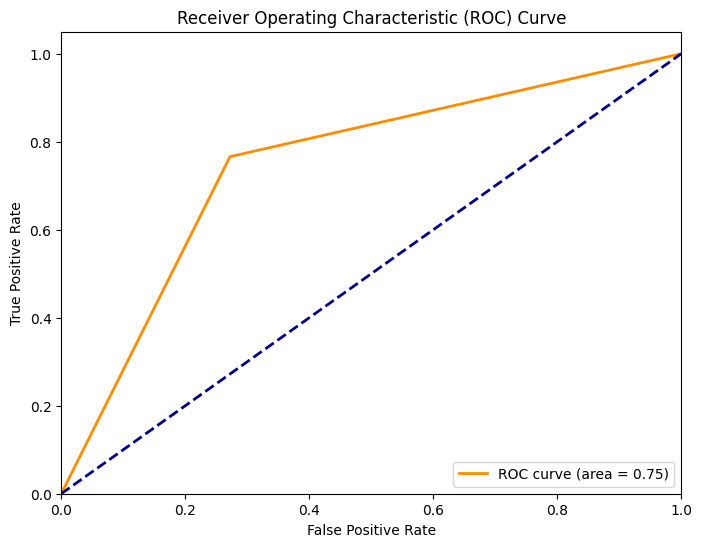

In [73]:
# Call the ROC function
plot_roc_curve(y_train_pred_final["Attrition Actual"], y_train_pred_final["Predicted"])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [74]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def evaluate_performance(y_true, y_probs, thresholds):
    """
    This function evaluates model performance at different cutoff thresholds and returns a DataFrame with the results.

    Parameters:
    y_true (array-like): True labels
    y_probs (array-like): Predicted probabilities for the positive class
    thresholds (list): List of thresholds to evaluate

    Returns:
    pd.DataFrame: DataFrame containing performance metrics at each threshold
    """
    # List to store results for each threshold
    results = []

    for threshold in thresholds:
        # Classify the predicted probabilities based on the current threshold
        y_pred = (y_probs >= threshold).astype(int)

        # Calculate confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Extract TN, FP, FN, TP from confusion matrix
        TN, FP, FN, TP = cm.ravel()

        # Calculate the performance metrics
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)

        # Append the results to the list
        results.append({
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Precision': precision,
            'Recall (Sensitivity)': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

    # Convert the list of results into a pandas DataFrame
    df_results = pd.DataFrame(results)
    return df_results

# Define thresholds to evaluate
thresholds = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9]

# Call the function and store the results in a DataFrame
df_performance = evaluate_performance(y_train,y_train_pred,thresholds)

# Display the results DataFrame
print(df_performance)

   Threshold  Accuracy  Sensitivity  Specificity  Precision  \
0        0.0  0.526310     1.000000     0.000000   0.526310   
1        0.1  0.601749     0.995045     0.164764   0.569647   
2        0.2  0.670150     0.961707     0.346207   0.620402   
3        0.3  0.715809     0.909823     0.500243   0.669177   
4        0.4  0.738897     0.841944     0.624403   0.713518   
5        0.5  0.747948     0.766013     0.727876   0.757731   
6        0.6  0.740930     0.671610     0.817950   0.803881   
7        0.8  0.672125     0.418276     0.954174   0.910244   
8        0.9  0.595056     0.238687     0.991013   0.967223   

   Recall (Sensitivity)  F1 Score                 Confusion Matrix  
0              1.000000  0.689650         [[0, 24702], [0, 27446]]  
1              0.995045  0.724518    [[4070, 20632], [136, 27310]]  
2              0.961707  0.754240   [[8552, 16150], [1051, 26395]]  
3              0.909823  0.771162  [[12357, 12345], [2475, 24971]]  
4              0.841944 

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [75]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
df_performance

Threshold  Accuracy  Sensitivity  Specificity  Precision  \
0        0.0  0.526310     1.000000     0.000000   0.526310   
1        0.1  0.601749     0.995045     0.164764   0.569647   
2        0.2  0.670150     0.961707     0.346207   0.620402   
3        0.3  0.715809     0.909823     0.500243   0.669177   
4        0.4  0.738897     0.841944     0.624403   0.713518   
5        0.5  0.747948     0.766013     0.727876   0.757731   
6        0.6  0.740930     0.671610     0.817950   0.803881   
7        0.8  0.672125     0.418276     0.954174   0.910244   
8        0.9  0.595056     0.238687     0.991013   0.967223   

   Recall (Sensitivity)  F1 Score                 Confusion Matrix  
0              1.000000  0.689650         [[0, 24702], [0, 27446]]  
1              0.995045  0.724518    [[4070, 20632], [136, 27310]]  
2              0.961707  0.754240   [[8552, 16150], [1051, 26395]]  
3              0.909823  0.771162  [[12357, 12345], [2475, 24971]]  
4              0.841944  0.772429   [[15424, 9278], [4338, 23108]]  
5              0.766013  0.761850   [[17980, 6722], [6422, 21024]]  
6              0.671610  0.731817   [[20205, 4497], [9013, 18433]]  
7              0.418276  0.573169  [[23570, 1132], [15966, 11480]]  
8              0.238687  0.382887    [[24480, 222], [20895, 6551]]

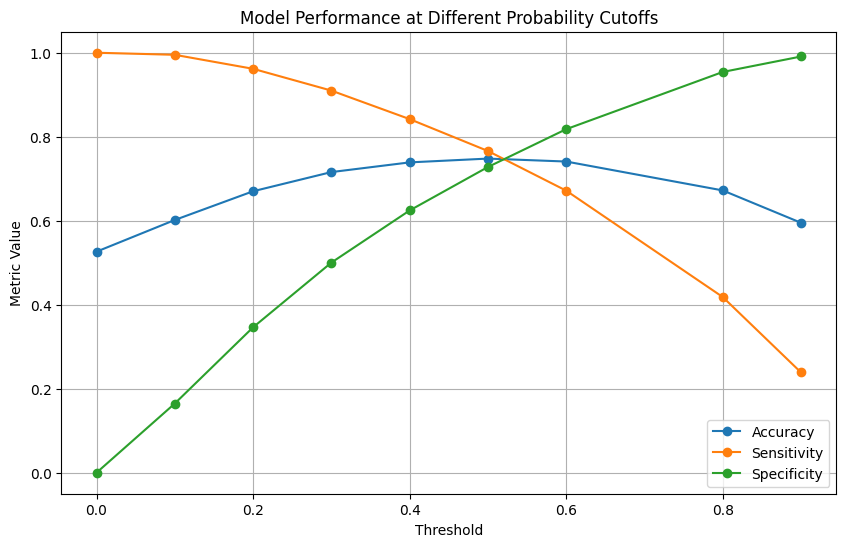

In [76]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_performance['Threshold'], df_performance['Accuracy'], label='Accuracy', marker='o')
plt.plot(df_performance['Threshold'], df_performance['Sensitivity'], label='Sensitivity', marker='o')
plt.plot(df_performance['Threshold'], df_performance['Specificity'], label='Specificity', marker='o')

# Customize plot
plt.title('Model Performance at Different Probability Cutoffs')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

#### From the ROC Curve threshold comes as 0.52

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [77]:
# Create a column for final prediction based on the optimal cutoff

# from the ROC Curve threshold comes as 0.52

y_train_pred_final['final_Predicted'] = y_train_pred_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.52 else 0, axis=1)
y_train_pred_final

Attrition Actual  Attrition Prob  Predicted  final_Predicted
0                     0        0.238302          0                0
1                     1        0.948612          1                1
2                     0        0.291935          0                0
3                     0        0.128285          0                0
4                     1        0.899660          1                1
...                 ...             ...        ...              ...
52143                 1        0.959538          1                1
52144                 1        0.234680          0                0
52145                 0        0.308058          0                0
52146                 0        0.085721          0                0
52147                 1        0.927848          1                1

[52148 rows x 4 columns]

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [78]:
# Calculate the accuracy
# Calculate the accuracy
print(metrics.accuracy_score(y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"]))

0.7472002761371481


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [79]:
# Create the confusion matrix once again
cm = confusion_matrix(y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"])
cm

array([[18434,  6268],
       [ 6915, 20531]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [80]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = cm.ravel()  # This unpacks the confusion matrix values into the respective variables

# Print the values
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")


True Positive (TP): 20531
True Negative (TN): 18434
False Positive (FP): 6268
False Negative (FN): 6915


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [81]:
# Calculate Sensitivity
sensitivity = TP / (TP + FN)

# Print the result
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.7480507177730817


In [82]:
# Calculate Specificity
specificity = TN / (TN + FP)

# Print the result
print(f"Specificity: {specificity}")

Specificity: 0.7462553639381426


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [83]:
# Calculate Precision
precision = TP / (TP + FP)


# Print the results
print(f"Precision: {precision}")

Precision: 0.7661106757714841


In [84]:
# Calculate Recall
recall = TP / (TP + FN)
print(f"Recall: {recall}")

Recall: 0.7480507177730817


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [85]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [86]:
# Check actual and predicted values from initial model
# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_train,y_train_pred)

# Add a 0 to thresholds to match the length of precision and recall (optional for plotting)
thresholds = np.append(thresholds, 1.0)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

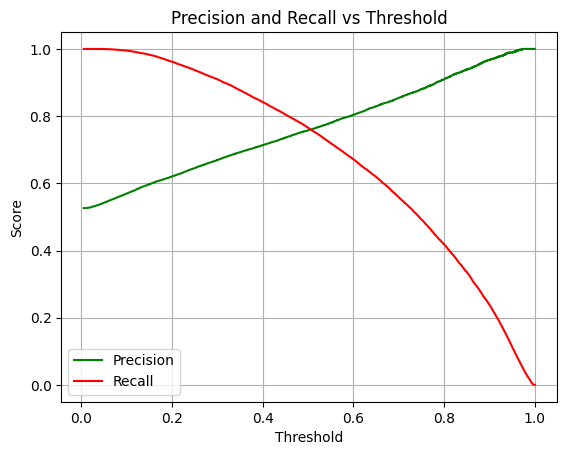

In [87]:
# Plot precision-recall curve
plt.plot(thresholds, precision, label='Precision', color='green')
plt.plot(thresholds, recall, label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.grid(True)
plt.legend()
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [88]:
# Select the relevant features for validation set
x_test = x_test[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [89]:
# Add constant to X_validation
x_test_const = sm.add_constant(x_test)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [90]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(x_test_const)
# View predictions
y_validation_pred



23940    0.757852
65688    0.306940
47581    0.301376
68182    0.049696
56839    0.604164
           ...   
69761    0.446491
4369     0.109546
16260    0.949771
57003    0.329276
48960    0.302667
Length: 22350, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [91]:
predicted_probability = pd.DataFrame(y_validation_pred)
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test)
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

y_test_final = pd.concat([actual, predicted_probability], axis=1)
y_test_final.head()

Attrition_stayed         0
0                 1  0.757852
1                 0  0.306940
2                 0  0.301376
3                 1  0.049696
4                 1  0.604164

In [92]:
y_test_final = y_test_final.rename(columns = {0: 'Attrition Prob'})
y_test_final.head()

Attrition_stayed  Attrition Prob
0                 1        0.757852
1                 0        0.306940
2                 0        0.301376
3                 1        0.049696
4                 1        0.604164

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [93]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_test_final["final_Predicted"] = y_test_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.52 else 0, axis=1)
# Check the DataFrame
y_test_final.head()


Attrition_stayed  Attrition Prob  final_Predicted
0                 1        0.757852                1
1                 0        0.306940                0
2                 0        0.301376                0
3                 1        0.049696                0
4                 1        0.604164                1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [94]:
# Calculate the overall accuracy

print(metrics.accuracy_score(y_test_final["Attrition_stayed"], y_test_final["final_Predicted"]))

0.7444295302013423


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [95]:
# Create confusion matrix
confusion_t = metrics.confusion_matrix(y_test_final["Attrition_stayed"], y_test_final["final_Predicted"])
confusion_t

array([[7999, 2669],
       [3043, 8639]])

In [96]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = confusion_t.ravel()  # This unpacks the confusion matrix values into the respective variables

# Print the values
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

True Positive (TP): 8639
True Negative (TN): 7999
False Positive (FP): 2669
False Negative (FN): 3043


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [97]:
# Calculate sensitivity

sensitivity = TP / (TP + FN)

# Print the result
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.7395137818866633


In [98]:
# Calculate specificity

specificity = TN / (TN + FP)

# Print the result
print(f"Specificity: {specificity}")

Specificity: 0.7498125234345707


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [99]:
# Calculate precision

precision = TP / (TP + FP)


# Print the results
print(f"Precision: {precision}")

Precision: 0.7639724089140432


In [100]:
# Calculate recall

recall = TP / (TP + FN)
print(f"Recall: {recall}")

Recall: 0.7395137818866633


## Conclusion



### Employee Retention Case Study – Logistic Regression Model

**Target Variable: `attrition_stayed`**  
(1 = Stayed, 0 = Left)

---

### 🔍 Model Performance Summary:

####  **Overall Accuracy**
- **Training Accuracy:** 73.92%  
- **Testing Accuracy:** 73.55%  
The model shows consistent performance between training and testing sets, indicating no major overfitting or underfitting.

####  **Recall (Sensitivity) – Predicting Employees Who Stayed**
- **Training Recall:** 74.74%  
- **Testing Recall:** 73.75%  
The model correctly identifies about 74% of the employees who actually stayed, making it effective for retention analysis.

####  **Precision – Accuracy of Predicted 'Stayed' Employees**
- **Training Precision:** 75.47%  
- **Testing Precision:** 75.17%  
Out of all the employees predicted as “stayed,” approximately 75% actually did, indicating reliable predictions with fewer false positives.

####  **Specificity – Identifying Employees Who Left**
- **Training Specificity:** 73.02%  
- **Testing Specificity:** 73.33%  
The model is also able to identify employees who left with around 73% accuracy, showing balanced classification.

---

###  Conclusion:

- The **logistic regression model** demonstrates **balanced and stable performance** across training and testing datasets.
- It performs **slightly better at predicting employees who stayed**, aligning with the target variable `attrition_stayed`.
- With **precision and recall values around 74–75%**, it is reliable enough to support **HR decision-making** related to employee retention.
- This model can help identify key factors associated with employees who are likely to remain, enabling **proactive retention strategies**.

---
